In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [8]:
from datasets import load_dataset

ds = load_dataset("scikit-learn/adult-census-income")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

adult.csv:   0%|          | 0.00/4.10M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/32561 [00:00<?, ? examples/s]

In [12]:
df = pd.DataFrame(ds["train"])

In [13]:
sensitive_attr = "sex"
target_col = "income"

In [14]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [15]:
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols.remove(target_col)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,-2.65732,-1.067997,0.181332,-0.420060,2.249480,-1.554283,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.291569,0
1,3.183112,0.09005,-0.539169,0.181332,-0.420060,2.249480,-0.608387,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.291569,0
2,2.010110,-2.65732,-0.035220,1.214869,-0.031360,2.249480,-1.554283,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.291569,0
3,1.130359,0.09005,-0.468215,-1.368974,-2.363558,-1.734058,0.101036,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,0
4,0.177296,0.09005,0.709482,1.214869,-0.031360,1.585557,0.810458,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,0.09005,1.140460,1.214869,-0.031360,0.921634,1.046932,-0.277805,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.291569,0
32557,-0.849080,0.09005,0.639741,-0.852205,0.746039,-0.406212,1.519881,2.211698,0.393668,-1.422331,-0.14592,-0.216660,-0.197409,0.291569,0
32558,0.103983,0.09005,-0.335433,0.181332,-0.420060,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.14592,-0.216660,-0.035429,0.291569,1
32559,1.423610,0.09005,-0.358777,0.181332,-0.420060,2.249480,-1.317809,1.589322,0.393668,-1.422331,-0.14592,-0.216660,-0.035429,0.291569,0


In [17]:
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [20]:
rf_preds = rf_model.predict(X_test)
ann_preds = ann_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [23]:
rf_acc = accuracy_score(y_test, rf_preds)
ann_acc = accuracy_score(y_test, ann_preds)
rf_f1 = f1_score(y_test, rf_preds)
ann_f1 = f1_score(y_test, ann_preds)

In [33]:
print(rf_acc, ann_acc, rf_f1, ann_f1)

0.8547520343927529 0.8392445877475817 0.6650141643059491 0.6370883882149047


In [26]:
def fairness_metrics(y_true, y_pred, sensitive_test):
    sp_diffs, eoo_diffs = [], []
    sensitive_values = np.unique(sensitive_test)

    for value in sensitive_values:
        idx = (sensitive_test == value)
        if np.sum(idx) == 0:
            continue

        y_pred_group = y_pred[idx]
        y_true_group = y_true[idx]

        sp = np.mean(y_pred_group) - np.mean(y_pred)
        sp_diffs.append(sp)

        idx_positive = y_true_group == 1
        if np.sum(idx_positive) > 0:
            eoo = np.mean(y_pred_group[idx_positive]) - np.mean(y_pred[y_true == 1])
            eoo_diffs.append(eoo)

    return np.abs(np.mean(sp_diffs)), np.abs(np.mean(eoo_diffs))


In [27]:
sensitive_test = X_test[sensitive_attr].values
rf_sp, rf_eoo = fairness_metrics(y_test.values, rf_preds, sensitive_test)
ann_sp, ann_eoo = fairness_metrics(y_test.values, ann_preds, sensitive_test)


In [28]:
metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "Random Forest", "ANN", "ANN"],
    "Metric": ["Statistical Parity", "Equality of Opportunity", "Statistical Parity", "Equality of Opportunity"],
    "Value": [rf_sp, rf_eoo, ann_sp, ann_eoo]
})


In [31]:
print(rf_sp, rf_eoo, ann_sp, ann_eoo)

0.03002866450993326 0.024468176335694924 0.030165586618516656 0.02789552308853893


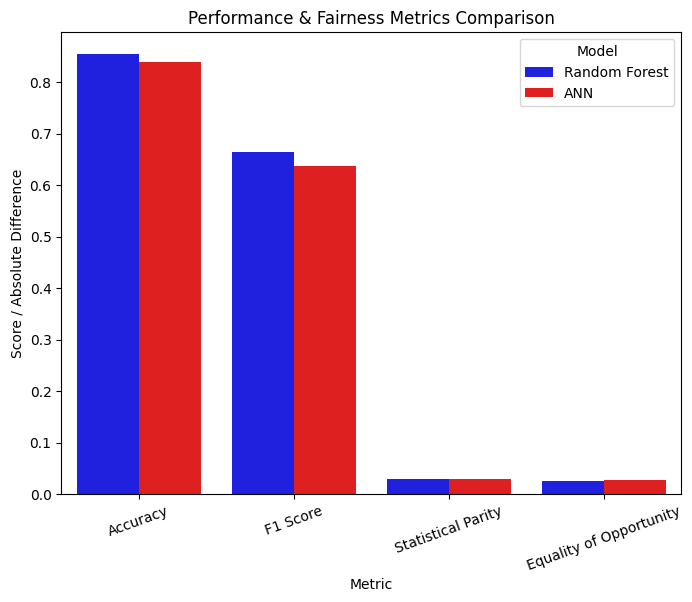

In [36]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score", "Statistical Parity", "Equality of Opportunity"] * 2,
    "Value": [rf_acc, rf_f1, rf_sp, rf_eoo, ann_acc, ann_f1, ann_sp, ann_eoo],
    "Model": ["Random Forest"] * 4 + ["ANN"] * 4
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=metrics_df, palette=["blue", "red"])
plt.title("Performance & Fairness Metrics Comparison")
plt.ylabel("Score / Absolute Difference")
plt.xticks(rotation=20)
plt.show()